# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load original football data
euro_fb = pd.read_csv("combined_data.csv")
#additional data
brazil_fb = pd.read_csv("Brasileirao_Matches.csv")

The original dataset is the football dataset. It contains information on football (American soccer) matches from the english, french, german, italian, and spanish leagues. This includes the teams playing, scores, match excitement, and a smattering of other match statistics. The additional dataset is football matches from the brazilian league. While it does not have a match excitement feature, it includes features similar to the original dataset such as teams playing and scores.

Questions:
   - What contributes to match excitement? Tie game? Team playing?
   - How much of an advantage is playing at home? Does this negatively impact match stats for away teams? Do home teams win more often?
   - Is there any discrepancy in goal scoring/match excitement by year? In other words is goal scoring/match excitement correlated at all to year?
   - Discrepancy in scores in the South American league vs European leagues?

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

#### European Leagues

In [3]:
#info() will get index of features and datatypes
euro_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12062 entries, 0 to 12061
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     12062 non-null  int64  
 1   Home Team                      12062 non-null  object 
 2   Away Team                      12062 non-null  object 
 3   Score                          12062 non-null  object 
 4   Half Time Score                12062 non-null  object 
 5   Match Excitement               12062 non-null  float64
 6   Home Team Rating               12062 non-null  float64
 7   Away Team Rating               12062 non-null  float64
 8   Home Team Possession %         12062 non-null  int64  
 9   Away Team Possession %         12062 non-null  int64  
 10  Home Team Off Target Shots     12062 non-null  float64
 11  Home Team On Target Shots      12062 non-null  float64
 12  Home Team Total Shots          12062 non-null 

In this original dataset, most of the data types are numerical. These describe the statistics of the match for both the home and away team. The home team, away team, score, halftime score, and league features are categorical. The home team and away team features appear to be the largest categorical features because they contain all the team names. An interesting element of this dataset is that there exists a categorical and numerical version of match final score. The categorical version is the score feature, and the numerical version is home team goals scored and away team goals scored. Through the data exploration and visualization phase I will examine the correlation of both to other features and determine which version will be more useful for answering the question posed about the data.

In [4]:
euro_fb.shape

(12062, 42)

There are 12,062 entries, each with 42 features. According to the info function each feature has 12,062 non-null entries. This means that there is not any missing information. The count function also verifies this, displayed below.

In [5]:
euro_fb.count()

Unnamed: 0                       12062
Home Team                        12062
Away Team                        12062
Score                            12062
Half Time Score                  12062
Match Excitement                 12062
Home Team Rating                 12062
Away Team Rating                 12062
Home Team Possession %           12062
Away Team Possession %           12062
Home Team Off Target Shots       12062
Home Team On Target Shots        12062
Home Team Total Shots            12062
Home Team Blocked Shots          12062
Home Team Corners                12062
Home Team Throw Ins              12062
Home Team Pass Success %         12062
Home Team Aerials Won            12062
Home Team Clearances             12062
Home Team Fouls                  12062
Home Team Yellow Cards           12062
Home Team Second Yellow Cards    12062
Home Team Red Cards              12062
Away Team Off Target Shots       12062
Away Team On Target Shots        12062
Away Team Total Shots    

In [6]:
print(euro_fb['year'].unique())
euro_fb['year'].value_counts()

[2014 2015 2016 2017 2018 2019 2020]


2017    1826
2018    1826
2020    1825
2016    1824
2019    1721
2014    1520
2015    1520
Name: year, dtype: int64

The timespan of this dataset spans from 2014 to 2020. While my question about match excitement correlation to year could be answered through correlation matrices analysis, if I wanted to make a prediction on match excitement given a year, I'd need to create a stratified train test split because the dataset as is does not have an equal divide of matches per year.

#### Brazil League

In [7]:
brazil_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         3800 non-null   object 
 1   home_team        3800 non-null   object 
 2   home_team_state  3800 non-null   object 
 3   away_team        3800 non-null   object 
 4   away_team_state  3800 non-null   object 
 5   home_goal        3755 non-null   float64
 6   away_goal        3755 non-null   float64
 7   season           3800 non-null   int64  
 8   round            3800 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 267.3+ KB


This dataset is smaller. We can see here that there are 3800 entries with 9 features each. Home goal, away goal, season, and round are numeric data types, while the remaining features are categorical. This dataset is slightly different in that it only has score represented numerically, not categorically like the original. Additionally, home goal and away goal are missing 45 entries, only containing 3755 entries instead of the full 3800.

In [8]:
brazil_fb[brazil_fb.home_goal.isnull()]

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
1897,2016-12-11 17:00:00,Chapecoense,SC,Atlético,MG,NaN,NaN,2016,38
3439,2021-11-23 21:00:00,Grêmio,RS,Flamengo,RJ,NaN,NaN,2021,2
3719,2021-11-23 19:00:00,Atlético,GO,Juventude,RS,NaN,NaN,2021,30
3739,2021-12-02 19:00:00,Bahia,BA,Atlético Mineiro,MG,NaN,NaN,2021,32
3759,2021-11-24 21:30:00,São Paulo,SP,Athletico Paranaense,PR,NaN,NaN,2021,34
3760,2021-11-23 21:30:00,Palmeiras,SP,Atlético Mineiro,MG,NaN,NaN,2021,35
3761,2021-11-24 21:30:00,Fluminense,RJ,Internacional,RS,NaN,NaN,2021,35
3762,2021-11-25 19:00:00,Santos,SP,Fortaleza,CE,NaN,NaN,2021,35
3763,2021-11-25 20:00:00,Ceará,CE,Corinthians,SP,NaN,NaN,2021,35
3764,2021-11-29 19:00:00,Atlético,GO,Bahia,BA,NaN,NaN,2021,35


In [9]:
euro_fb['league'].value_counts()

english    2660
spanish    2660
italian    2658
french     2554
german     1530
Name: league, dtype: int64

The table above are the rows that do not have a value for home or away goals. Since there will already be more entries for the brazilian league compared to each other league in the original dataset, it is okay to delete these 45 entries. Additionally, there are many different combinations of score that a football match can have, so inputing scores based on mean might not be the best approach.

In [10]:
brazil_fb.dropna(subset=['home_goal', 'away_goal'], inplace=True)
print(brazil_fb.shape)
if(brazil_fb[brazil_fb.home_goal.isnull()].empty):
    print("No null values")

(3755, 9)
No null values


In [11]:
brazil_fb['season'].value_counts()

2012    380
2013    380
2014    380
2015    380
2017    380
2018    380
2019    380
2020    380
2016    379
2021    336
Name: season, dtype: int64

The timespan for this dataset is 2012 to 2021. This is longer than the original dataset timespan, which is an important consideration when attempting to merge the two datasets. The years outside of the 2014-2020 span will likely be deleted in order to get the number of matches from the brazilian league to a value closer to that of the other leagues. This is also important in order to get better results in answering the question on year correlation with goal scoring that encompasses all leagues.

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

In [12]:
#poor naming for first column, double checking all are unique, which would just make it match id
euro_fb['Unnamed: 0'].is_unique

True

In [13]:
euro_fb.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
euro_fb.columns

Index(['id', 'Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored',
     

### European League Dataset
- id: unique number that represents a particular match
    - numeric data
- Home Team: name of the home team
    - categorical data: nominal
- Away Team: name of the visiting team
    - categorical data: nominal
- Score: number of goals scored by each team by the end of the 90 min match. The format is the home team score, a '-', then the away team score
    - categorical data: ordinal
- Half Time Score: number of goals scored by each team by the end of 45 minutes. Same format as score feature.
    - categorical data: ordinal
- Match Excitement: fan excitement of a football match on a scale of 0-10
    - numeric data
- Home Team Rating: skill of the home football team represented numerically on a scale of 0-10
    - numeric data
- Away Team Rating: skill of the away football team represented numerically on a scale of 0-10
    - numeric data
- Home Team Possession %: percentage of the match that the home team possesses the ball
    - numeric data
- Away Team Possession %: percentage of the match that the away team possesses the ball
    - numeric data
- Home Team Off Target Shots: number of shots the home team makes that misses the goal entirely
    - numeric data
- Home Team On Target Shots: number of shots the home team makes that is in the area of the goal. This includes shots that score and those that are blocked by the goalie
    - numeric data
- Home Team Total Shots: total number of shots that the home team makes. Sum of off target and on target shots
    - numeric data
- Home Team Blocked Shots: number of shots on that are blocked by the home team goalie or nearby defenders
    - numeric data
- Home Team Corners: number of corner kicks by the home team
    - numeric data
- Home Team Throw Ins: number of throw ins by the home team
    - numeric data
- Home Team Pass Success %: percentage of passes that are not blocked or intercepted by the away team
    - numeric data
- Home Team Aerials Won: number of contested aerial kicks won/possessed by the home team
    - numeric data
- Home Team Clearances: number of times the ball is cleared from the home team side of the pitch/field
    - numeric data
- Home Team Fouls: number of times the home team commits a foul or gets carded
    - numeric data
- Home Team Yellow Cards: total number of players on the home team given a yellow card for a foul during a match
    - numeric data
- Home Team Second Yellow Cards: total number of players on the home team that are given two yellow cards after a repeat offense. This results in an immediate red card.
    - numeric data
- Home Team Red Cards: total number of players on the home team that are given a red card. Includes players who get red card without yellow card warning and players who get two yellows, resulting in red.
    - numeric data
- Away Team Off Target Shots - Away Team Red Cards: features with same description as those corresponding to the home team, just for away team
    - all numeric data
- Home Team Goals Scored: number of goals scored by the home team in numeric representation
    - numeric data
- Away Team Goals Scored: number of goals scored by the away team in numeric representation
    - numeric data
- Home Team Goals Conceeded: number of goals given up by home team. Could be different than away team goals scored value if home team scores an own goal (player accidently scores into their own goal)
    - numeric data
- Away Team Goals Conceeded: number of goals given up by away team.
    - numeric data
- year: year the match took place from 2014-2020
    - categorical data: interval
- league: which league the match took place in
    - categorical data: nominal

#### Numeric Feature Statistics

In [14]:
features=[column for column in euro_fb.columns if euro_fb[column].dtype != object]
features.remove('id') #don't need data on this
features.remove('year') #categorical

for feature in features:
    print(feature, ": \n")
    print("Min: ", euro_fb[feature].min())
    print("Max: ", euro_fb[feature].max())
    print("Mean: ", round(euro_fb[feature].mean(), 2))
    print("Median: ", euro_fb[feature].median(), "\n")

Match Excitement : 

Min:  1.4
Max:  10.0
Mean:  5.39
Median:  5.3 

Home Team Rating : 

Min:  2.1
Max:  10.0
Mean:  6.4
Median:  6.4 

Away Team Rating : 

Min:  1.3
Max:  10.0
Mean:  6.14
Median:  6.1 

Home Team Possession % : 

Min:  17
Max:  84
Mean:  51.2
Median:  51.0 

Away Team Possession % : 

Min:  16
Max:  83
Mean:  48.8
Median:  49.0 

Home Team Off Target Shots : 

Min:  0.0
Max:  20.0
Mean:  5.64
Median:  5.0 

Home Team On Target Shots : 

Min:  0.0
Max:  18.0
Mean:  4.72
Median:  4.0 

Home Team Total Shots : 

Min:  0.0
Max:  47.0
Mean:  13.69
Median:  13.0 

Home Team Blocked Shots : 

Min:  0.0
Max:  19.0
Mean:  3.34
Median:  3.0 

Home Team Corners : 

Min:  0.0
Max:  20.0
Mean:  5.49
Median:  5.0 

Home Team Throw Ins : 

Min:  4.0
Max:  49.0
Mean:  22.35
Median:  22.0 

Home Team Pass Success % : 

Min:  42.0
Max:  94.0
Mean:  78.73
Median:  80.0 

Home Team Aerials Won : 

Min:  0.0
Max:  67.0
Mean:  17.08
Median:  16.0 

Home Team Clearances : 

Min:  0.0
Max:

In [15]:
print(euro_fb['Score'].unique())
print("\nItalian League: ", euro_fb['Score'].where(euro_fb['league']=='italian').unique())
print("\nEnglish League: ", euro_fb['Score'].where(euro_fb['league']=='english').unique())
print("\nFrench League: ", euro_fb['Score'].where(euro_fb['league']=='french').unique())
print("\nGerman League: ", euro_fb['Score'].where(euro_fb['league']=='german').unique())
print("\nSpanish League: ", euro_fb['Score'].where(euro_fb['league']=='spanish').unique())

['1-2' '2-2' '0-1' '2-1' '0-2' '1-3' '0-0' '1-0' '2-0' '4-0' '1-1' '3-1'
 '3-0' '3-3' '3-6' '0-3' '4-2' '5-3' '2-3' '2-4' '4-1' '8-0' '3-2' '1-4'
 '0-5' '5-0' '0-4' '4-3' '6-0' '6-1' '5-1' '3-4' '2-5' '6-2' '1-5' '4-5'
 '0-6' '5-4' '6-3' '1-6' '1-7' '7-2' '5-2' '2-6' '0-9' '0-7' '9-0' '2-7'
 '3-5' '7-1' '4-4' '7-0' '8-1' '03-Jan' '01-Jan' '01-Feb' '04-May'
 '02-Jan' '02-Feb' '02-Mar' '03-Mar' '01-Apr' '04-Feb' '03-Feb' '01-Mar'
 '06-Feb' '02-Apr' '04-Mar' '05-Jan' '05-Feb' '04-Jan' '01-May' '03-Apr'
 '03-May' '05-Mar' '01-Jul' '02-Jun' '07-Jan' '05-Apr' '07-Mar' '06-Jan'
 '02-May' '02-Jul' '01-Jun' '2-8' '9-1' '0-8' '7-3' '10-2' '6-4' '8-2']

Italian League:  [nan '0-1' '2-0' '03-Jan' '0-0' '01-Jan' '01-Feb' '1-0' '3-0' '7-0'
 '04-May' '02-Jan' '02-Feb' '02-Mar' '03-Mar' '0-3' '01-Apr' '04-Feb'
 '0-4' '03-Feb' '0-2' '01-Mar' '06-Feb' '02-Apr' '5-0' '04-Mar' '4-0'
 '05-Jan' '05-Feb' '04-Jan' '01-May' '6-0' '03-Apr' '03-May' '0-5'
 '05-Mar' '01-Jul' '02-Jun' '07-Jan' '05-Apr' '07-Mar' '0

Through attempting to visualize the score feature, I discovered that the Italian league score feature was incorrectly filled with dates. The home score and away score numerical features, which will be shown later, do have correct values in them, so that improves the case in using the numerical score features compared to the features that represent score as a categorical variable.

#### Visualization

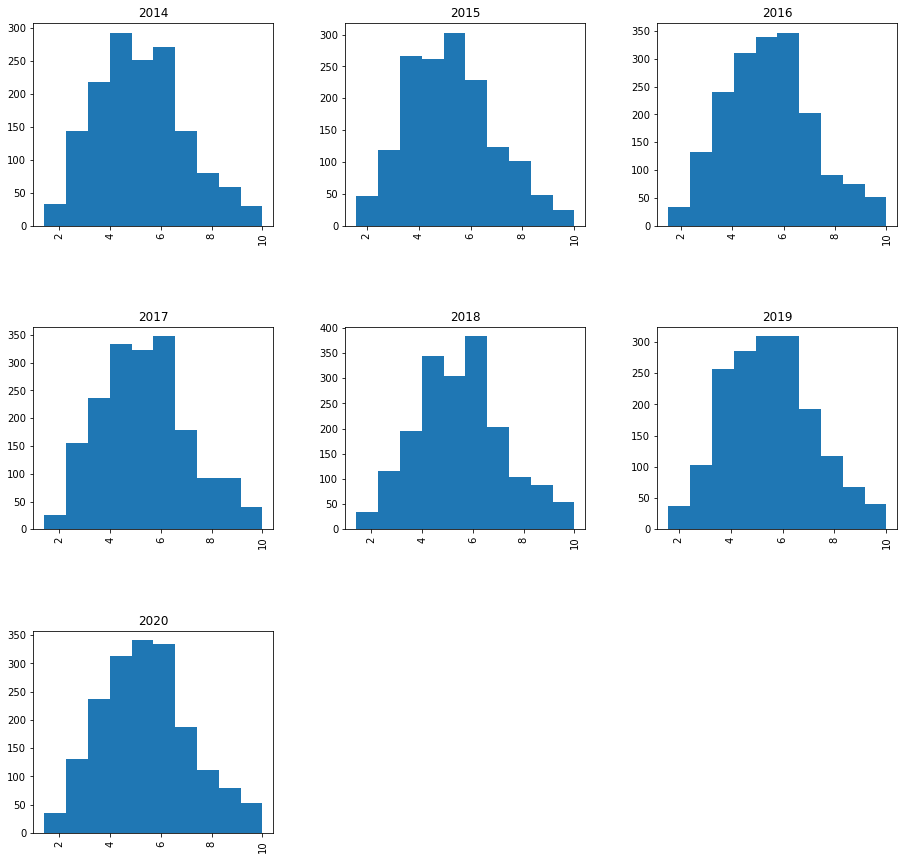

In [16]:
#Group match excitement by year and display results in histograms
euro_fb['Match Excitement'].hist(by=euro_fb['year'], figsize=(15,15))

None #don't display obj

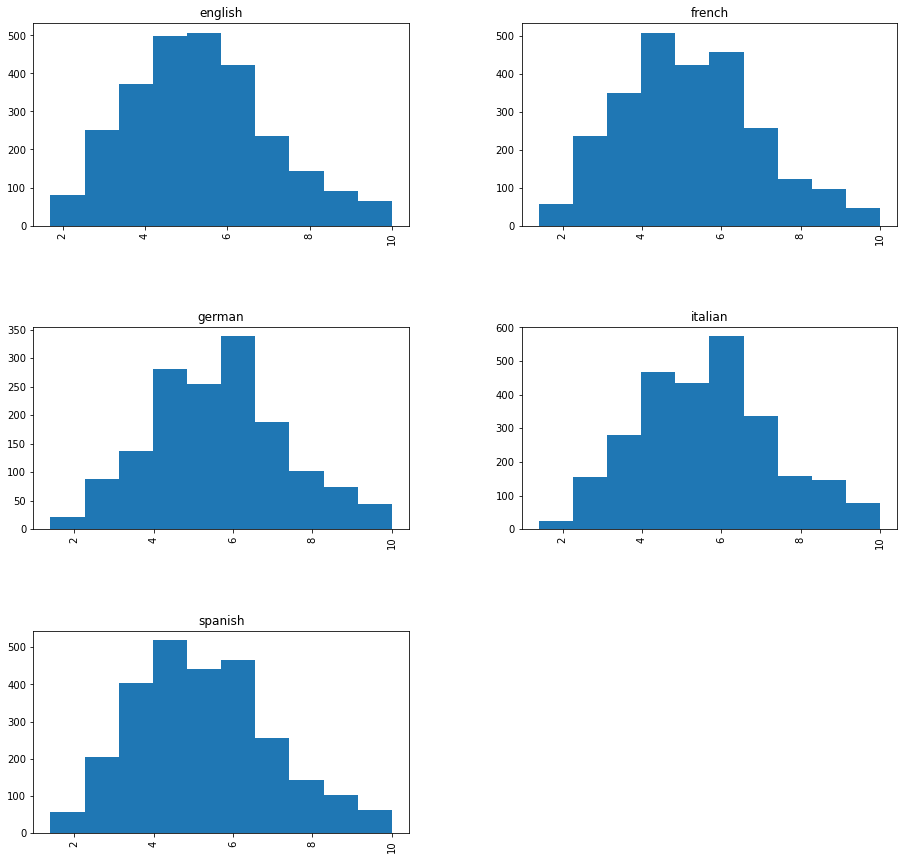

In [17]:
#group match excitement by league and display results
euro_fb['Match Excitement'].hist(by=euro_fb['league'], figsize=(15,15))

None

### Brazil League Dataset

- datetime: day and time of match
    - numeric data
- home_team: name of the home team
    - categorical data: nominal
- home_team_state: name of the state that the home team is from
    - categorical data: nominal
- away_team: name of the away team
    - categorical data: nominal
- away_team_state: name of the state that the away team is from
    - categorical data: nominal
- home_goal: number of goals the home team scored
    - numeric data
- away_goal: number of goals the away team scored
    - numeric data
- season: year the match took place in
    - categorical data: interval
- round: numerical representation of the week the match occurred in
    - categorical data: interval

#### Numeric Data Statistics

In [18]:
features=['home_goal', 'away_goal']

for feature in features:
    print(feature, ": \n")
    print("Min: ", brazil_fb[feature].min())
    print("Max: ", brazil_fb[feature].max())
    print("Mean: ", round(brazil_fb[feature].mean(), 2))
    print("Median: ", brazil_fb[feature].median(), "\n")

home_goal : 

Min:  0.0
Max:  6.0
Mean:  1.41
Median:  1.0 

away_goal : 

Min:  0.0
Max:  6.0
Mean:  0.95
Median:  1.0 



#### Visualization

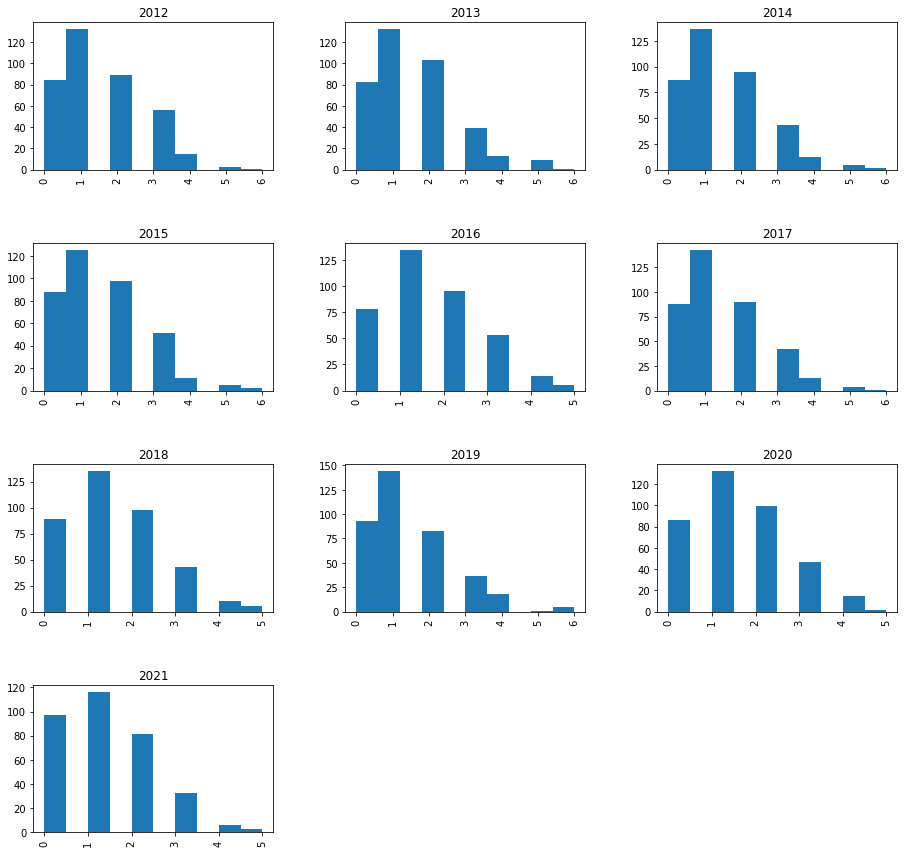

In [19]:
#number of goals scored by the home team by year
brazil_fb['home_goal'].hist(by=brazil_fb['season'], figsize=(15,15))

None

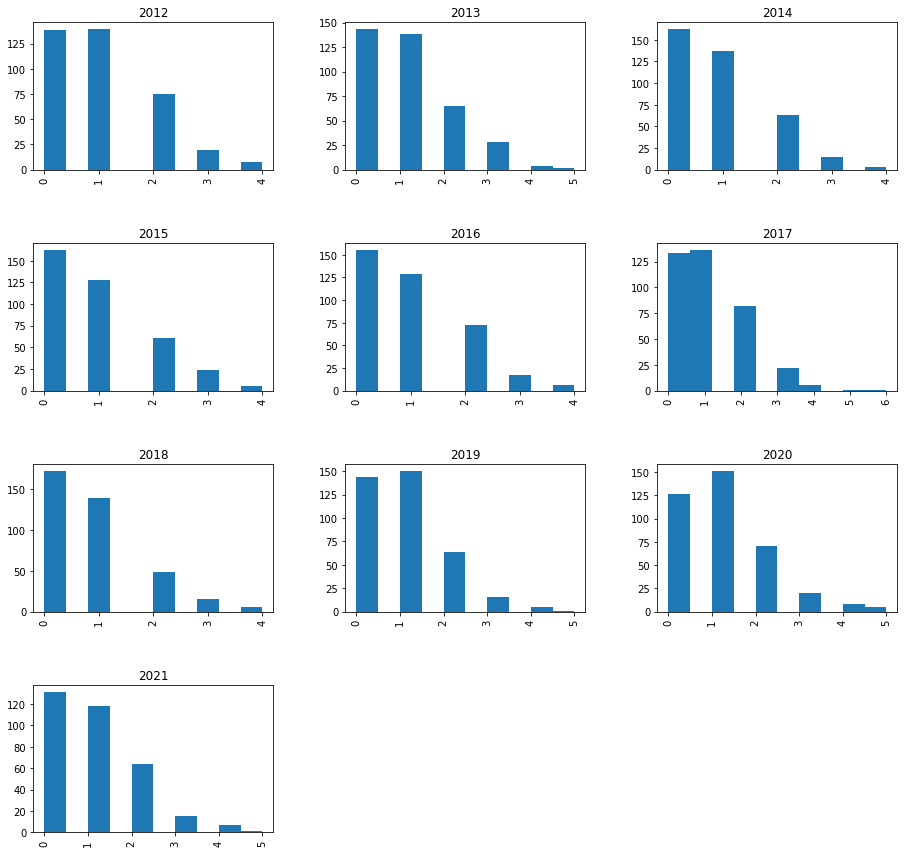

In [20]:
#number of goals scored by the away team by year
brazil_fb['away_goal'].hist(by=brazil_fb['season'], figsize=(15,15))

None

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

Since the Brazil data set is an extension in the number of observations, not an extension of features, concatenation of the brazil dataset on the european league dataset is the best method.

In [21]:
#set in common features to same name as in european dataset
brazil_fb.rename(columns={'home_team': 'Home Team'}, inplace=True)
brazil_fb.rename(columns={'away_team': 'Away Team'}, inplace=True)
brazil_fb.rename(columns={'home_goal': 'Home Team Goals Scored'}, inplace=True)
brazil_fb.rename(columns={'away_goal': 'Away Team Goals Scored'}, inplace=True)
brazil_fb.rename(columns={'season': 'year'}, inplace=True)

#adding another column to specify these matches are from brazil league
brazil_fb['league'] = np.repeat("brazilian", len(brazil_fb))

In [22]:
brazil_fb.head()

,datetime,Home Team,home_team_state,Away Team,away_team_state,Home Team Goals Scored,Away Team Goals Scored,year,round,league
0,2012-05-19 18:30:00,Palmeiras,SP,Portuguesa,SP,1.0,1.0,2012,1,brazilian
1,2012-05-19 18:30:00,Sport,PE,Flamengo,RJ,1.0,1.0,2012,1,brazilian
2,2012-05-19 21:00:00,Figueirense,SC,Náutico,PE,2.0,1.0,2012,1,brazilian
3,2012-05-20 16:00:00,Ponte Preta,SP,Atlético,MG,0.0,1.0,2012,1,brazilian
4,2012-05-20 16:00:00,Corinthians,SP,Fluminense,RJ,0.0,1.0,2012,1,brazilian


In [23]:
#merge the datasets via appending the brazil dataset to the european one
all_fb = euro_fb.append(brazil_fb)
#to confirm successful merge, visualize
all_fb.tail(10)

,id,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league,datetime,home_team_state,away_team_state,round
3749,NaN,Sport,Bahia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,2021,brazilian,2021-11-18 21:00:00,PE,BA,33.0
3750,NaN,Red Bull Bragantino,Sport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,NaN,NaN,2021,brazilian,2021-10-28 19:00:00,SP,PE,34.0
3751,NaN,Atlético Mineiro,Juventude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,NaN,NaN,2021,brazilian,2021-11-20 19:00:00,MG,RS,34.0
3752,NaN,Fortaleza,Palmeiras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,2021,brazilian,2021-11-20 19:00:00,CE,SP,34.0
3753,NaN,Chapecoense,Grêmio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,NaN,NaN,2021,brazilian,2021-11-20 19:00:00,SC,RS,34.0
3754,NaN,Atlético,Ceará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,2021,brazilian,2021-11-20 21:00:00,GO,CE,34.0
3755,NaN,Internacional,Flamengo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,2021,brazilian,2021-11-20 21:30:00,RS,RJ,34.0
3756,NaN,Corinthians,Santos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,NaN,NaN,2021,brazilian,2021-11-21 16:00:00,SP,SP,34.0
3757,NaN,Fluminense,America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.0,NaN,NaN,2021,brazilian,2021-11-21 17:00:00,RJ,MG,34.0
3758,NaN,Bahia,Cuiabá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,2021,brazilian,2021-11-21 19:00:00,BA,MT,34.0


Firstly, the dataset has successfully merged. Like features, such as home team goals scored, home team, year, league, etc, are appended/concatenated to the european dataset. However, this dataset can use alot of cleaning. The excess features from the brazilian dataset such as datetime (year really is only important), home team state, round, etc, can be removed. Additionally, score and half time score are not really needed because it is redundant information and is incorrect in some leagues (italian). Similarly, looking at the numerical statistics above, it seems that home team goals scored and away team goals conceeded are the exact same information. Home team and away team goals conceeded can be removed. Lastly, id isn't really useful because it is just a random number, and each match is already uniquely identified by its unique index in the dataframe, so it too can be removed.

In [24]:
#remove excess and redundant features
all_fb.drop(columns=['id', 'Score', 'Half Time Score', 'Home Team Goals Conceeded', 'Away Team Goals Conceeded',
                    'datetime', 'home_team_state', 'away_team_state', 'round'], inplace=True)
all_fb.tail(10)

,Home Team,Away Team,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,...,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year,league
3749,Sport,Bahia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2021,brazilian
3750,Red Bull Bragantino,Sport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,2021,brazilian
3751,Atlético Mineiro,Juventude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2021,brazilian
3752,Fortaleza,Palmeiras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2021,brazilian
3753,Chapecoense,Grêmio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2021,brazilian
3754,Atlético,Ceará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2021,brazilian
3755,Internacional,Flamengo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2021,brazilian
3756,Corinthians,Santos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2021,brazilian
3757,Fluminense,America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2021,brazilian
3758,Bahia,Cuiabá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2021,brazilian


The brazilian dataset does not have the detailed match stats the european one does, resulting in lots of null values. However, it does provide the overall dataset with match scores from a league outside of the main european leagues, allowing for some compare and contrast analysis. Additionally, the overall dataset now better encompasses match data from international leagues.

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

Variables to explore: Home Team, Away Team, Match Excitement, Home Team Goals Scored, Away Team Goals Scored, year, league, Home Team Rating, Away Team Rating

Predictor Variables:
- Home Team
- Away Team
- Home Team Goals Scored
- Away Team Goals Scored
- year
- league
- Home Team Rating
- Away Team Rating

Target:
- Match Excitement (using european league)
- Home/Away Team Goals Scored (using euro+brazilian league)

Match Excitement is the best variable/most interesting to predict because of its dependency on many different factors. The teams playing, the score, the league, etc. While the brazil league does not have a match excitement feature, and does not contain many of the predictor variables, establishing the relationship between goals scored and excitement using the european league could help eventually predict match excitement for the brazilian league.

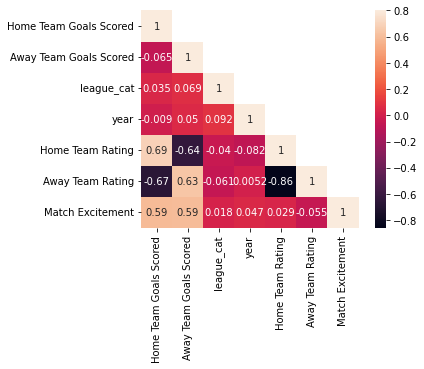

In [30]:
from sklearn.preprocessing import LabelEncoder

#encode league categorical variable to analyze correlation with numerical variables, label encoder is
#easy for the 6 categories
label_enc = LabelEncoder()
all_fb['league_cat'] = label_enc.fit_transform(all_fb['league'])

#use correlation matrix and put into heatmap
corrMatt = all_fb[['Home Team Goals Scored', 'Away Team Goals Scored', 'league_cat',
                  'year', 'Home Team Rating', 'Away Team Rating', 'Match Excitement']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

None

This heatmap of correlations reaffirmed lots of assumptions of the dataset. Match excitement is most correlated to the goals scored during the game, which makes the most sense. The team rating is correlated to goals scored, which makes sense since the most skilled teams should score more. In the previous visualizations, match excitement distribution looked similiar across the different years and different leagues. The correlation matrix confirms that year and league do not directly impact match excitement. A surprise was that match excitement is independent of the skill level/rating of the teams.

In [26]:
goals_v_excitement = all_fb.filter(['Match Excitement', 'Home Team Goals Scored', 'Away Team Goals Scored'])
print(goals_v_excitement.shape)

tie_game = []
separated_by_1 = []
separated_by_2_or_more = []

# for match in goals_v_excitement
for (index, row) in goals_v_excitement.iterrows():
    if(np.isnan(row['Match Excitement'])==False):
        if(row['Home Team Goals Scored']-row['Away Team Goals Scored'] == 0):
            # only get first 2000 samples of match excitement resulting from ties
            # so each category is of same size
            if len(tie_game) <= 2000:
                tie_game.append(row['Match Excitement'])
        elif(abs(row['Home Team Goals Scored']-row['Away Team Goals Scored'] == 1)):
            if len(separated_by_1) <= 2000:
                separated_by_1.append(row['Match Excitement'])
        else: #match is separated by 2 goals or more
            if len(separated_by_2_or_more) <= 2000:
                separated_by_2_or_more.append(row['Match Excitement'])

match_score = pd.DataFrame()
match_score['Tie Game'] = tie_game
match_score['Score Separated By 1'] = separated_by_1
match_score['Score Separated By 2 or more'] = separated_by_2_or_more

match_score.head()

(15817, 3)


,Tie Game,Score Separated By 1,Score Separated By 2 or more
0,7.3,5.8,5.9
1,7.0,6.0,4.8
2,2.6,3.1,3.8
3,2.3,4.2,2.8
4,7.3,5.7,4.6


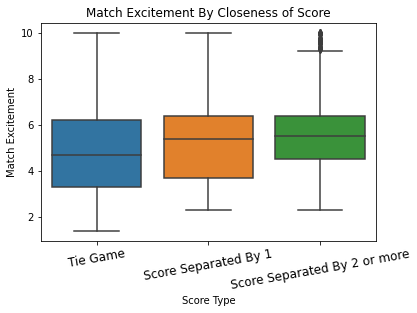

In [31]:
sns.boxplot(data=match_score)
plt.xticks(rotation=10, fontweight='light', fontsize='large')
plt.title("Match Excitement By Closeness of Score")
plt.ylabel("Match Excitement")
plt.xlabel("Score Type")

None

The above looked to analyze the effect of score on match excitement. Again, while the brazilian dataset did not contain the match excitement feature, analyzing the relationship between score and match excitement from the european dataset could impact how a model is developed to predict match excitement from scores in the brazilian league. Through this, it can easily be determined that a game that is not tied is slightly less exciting than that where the score differs. The tie game column is most likely slightly skewed because of scoreless games. Games tied at 1 or 2 are more exciting that 0-0, which is why the range of values in the tie game column covers virtually the entire range of 0-10. However, according to this data games where the score is separated by a margin larger than 1 will on average have a higer match excitement.

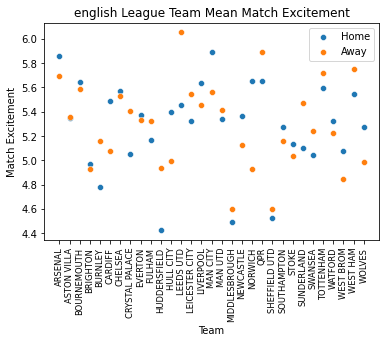

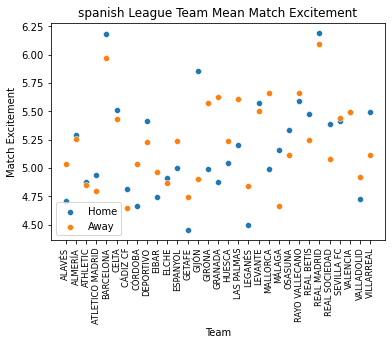

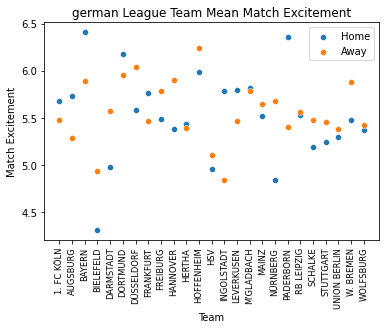

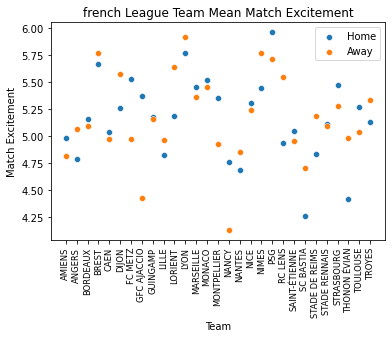

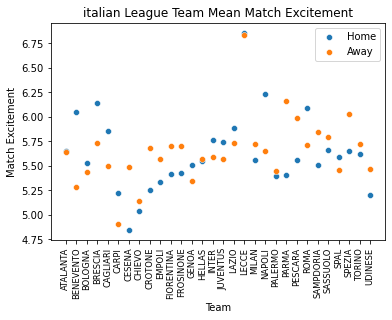

In [28]:
home_stats = all_fb['Match Excitement'].groupby([all_fb['Home Team'], all_fb['league']]).mean()
home_stats = home_stats.reset_index()
home_stats = pd.DataFrame(home_stats)

away_stats = all_fb['Match Excitement'].groupby([all_fb['Away Team'], all_fb['league']]).mean()
away_stats = away_stats.reset_index()
away_stats = pd.DataFrame(away_stats)

leagues = ['english', 'spanish', 'german', 'french', 'italian'] #brazil omitted bc no match excitement data

for league in leagues:
    hs_data = home_stats[home_stats.league == league]
    as_data = away_stats[away_stats.league == league]

    plot1 = sns.scatterplot(data=hs_data, x='Home Team', y='Match Excitement')
    plot2 = sns.scatterplot(data=as_data, x='Away Team', y='Match Excitement')
    plt.xticks(rotation=90, fontweight='light', fontsize='small')
    plt.legend(labels=["Home", "Away"])
    plt.title(str(league + " League Team Mean Match Excitement"))
    plt.xlabel("Team")
    plt.show()

None #don't display label objects

These scatterplots above show the positive relationship of the team playing on match excitement. While it has already been established through deductive reasoning that a close game positively impacts match excitement, any team in any league can create close games. Since the average match excitement for each team within a league differs, it can be concluded that the team playing does have an impact on fan interest in a game. For example, in the english league, Arsenal is a very popular team, resulting in a higher mean match excitement. It can also be determined from comparing by league that the italian and german teams attract the most fan interest, indicated by a majority of the mean match excitement being between 5.0 and 6.0

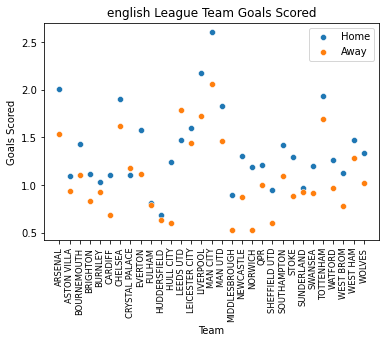

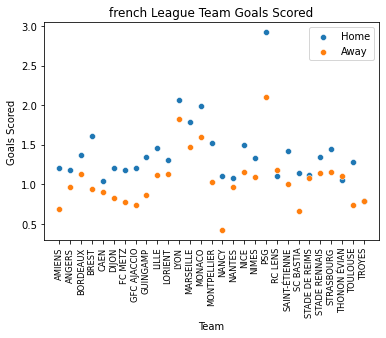

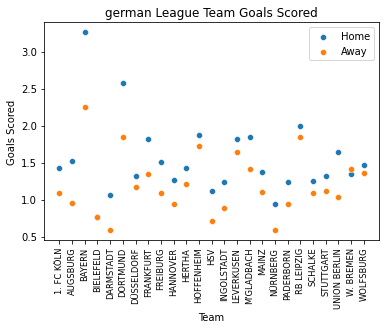

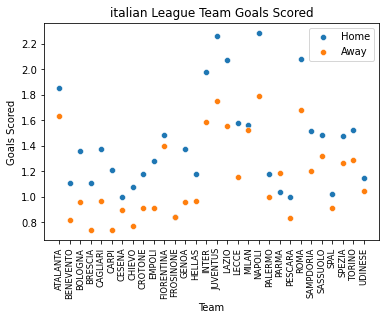

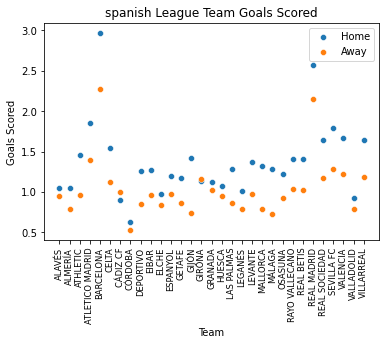

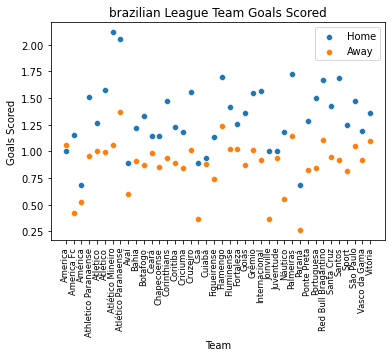

In [29]:
home_stats = all_fb['Home Team Goals Scored'].groupby([all_fb['Home Team'], all_fb['league']]).mean()
home_stats = home_stats.reset_index()
home_stats = pd.DataFrame(home_stats)

away_stats = all_fb['Away Team Goals Scored'].groupby([all_fb['Away Team'], all_fb['league']]).mean()
away_stats = away_stats.reset_index()
away_stats = pd.DataFrame(away_stats)

leagues = all_fb['league'].unique()

for league in leagues:
    hs_data = home_stats[home_stats.league == league]
    as_data = away_stats[away_stats.league == league]

    plot1 = sns.scatterplot(data=hs_data, x='Home Team', y='Home Team Goals Scored')
    plot2 = sns.scatterplot(data=as_data, x='Away Team', y='Away Team Goals Scored')
    plt.xticks(rotation=90, fontweight='light', fontsize='small')
    plt.legend(labels=["Home", "Away"])
    plt.title(str(league + " League Team Goals Scored"))
    plt.xlabel("Team")
    plt.ylabel("Goals Scored")
    plt.show()

None #don't display label objects

The scatterplots above primarily show the positive impact of home field advantage on goal scoring. While there are some outliers of the higher skilled teams averaging more goals, most teams average about the same number of goals throughout the years. However, seen through many of the blue dots being above the orange dots for each respective team, it can be concluded that each team does better scoring wise when at their home turf.

Answers to original questions:
- What contributes to match excitement? Tie game? Team playing?
    - Both. More popular teams get more excitement, and games where a team is winning by a margin larger than 1 on average have higher match excitement.
- How much of an advantage is playing at home? Does this negatively impact match stats for away teams? Do home teams win more often?
    - It is an advantage, seen by greater goals scored at home than away for each team. While not directly analyzed, one can assume that scoring more goals results in winning more often.
- Is there any discrepancy in goal scoring/match excitement by year? In other words is goal scoring/match excitement correlated at all to year?
    - Match Excitement is not correlated to year per the heatmap.
- Discrepancy in scores in the South American league vs European leagues?
    - League is not correlated to home or away team goals scored per the heatmap. This can also be seen in team goals scored scatterplots, where a majority of dots are between 1 and 2 goals scored per game on average.